<a href="https://colab.research.google.com/github/doanthanhnam1/DoanThanhNam/blob/main/ANN_CNN_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from keras import models  
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()
print(train_X.shape)
print(test_X.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Text(0.5, 1.0, 'so: 8')

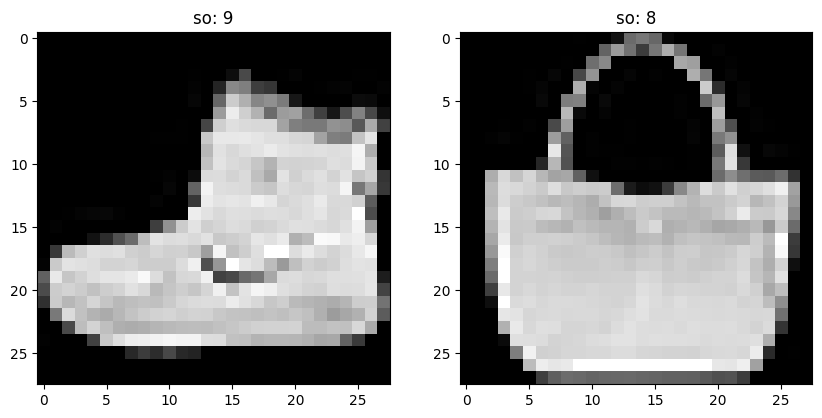

In [2]:
plt.figure(figsize=[10,10])
plt.subplot(121)
plt.imshow(train_X[0],cmap='gray')
plt.title('so: {}'.format(train_Y[0]))
plt.subplot(122)
plt.imshow(train_X[100],cmap='gray')
plt.title('so: {}'.format(train_Y[100]))

In [3]:
from numpy.ma.core import reshape
train_X=train_X.reshape(60000,28,28,1)
test_X=test_X.reshape(10000,28,28,1)
print(train_X.shape)
print(test_X.shape)
train_X=train_X.astype('float32')
train_X=train_X/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
from keras.utils import to_categorical 
train_Y= to_categorical(train_Y)
test_Y= to_categorical(test_Y)
print(test_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
from keras import models 
from keras.models import Sequential,Model
from keras import Input
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization
from keras.optimizers import Adam
batch_size=64 #lô
epochs=20     #số lần học
classes=10    #phân loại

In [6]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
#so lan tich chap
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [7]:
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [8]:
from keras import optimizers
from keras import losses
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()
train=model.fit(train_X,train_Y,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [9]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/deep_learning.h5")

In [10]:
eval=model.evaluate(test_X,test_Y,verbose=0)
print('test loss:',eval[0])
print('test accuracy:',eval[1])


test loss: 144.01739501953125
test accuracy: 0.8439000248908997


Text(0.5, 1.0, 'Training & Testing Accuracy')

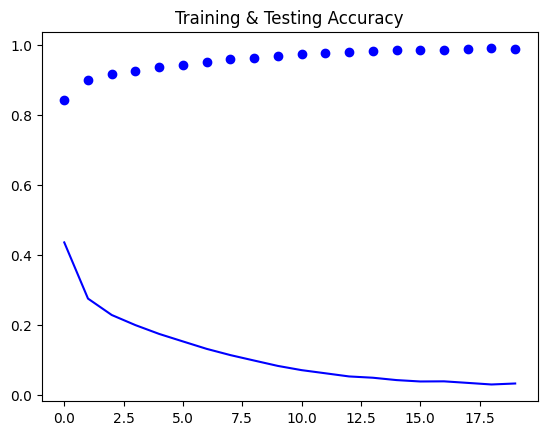

In [11]:
accuracy=train.history['accuracy']
val_accuracy=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Test Accuracy')
plt.title('Training & Testing Accuracy')


In [17]:

import pandas as pd
from keras import models  
from keras.models import load_model
model100=load_model('/content/drive/MyDrive/Colab Notebooks/BT/cifar100.h5')

In [18]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array

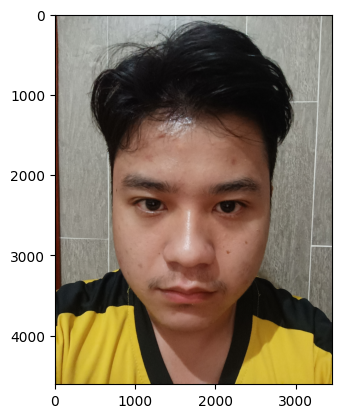

In [19]:
img=load_img('/content/drive/MyDrive/New/IMG_20230327_053531.jpg')
plt.imshow(img)
plt.show()

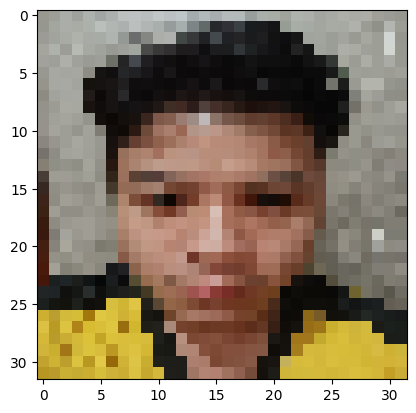

In [20]:
img = load_img('/content/drive/MyDrive/New/IMG_20230327_053531.jpg',target_size=(32,32))
plt.imshow(img)
     

In [21]:
import numpy as np
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model100.predict(img),axis=-1)

1/1 [==============================] - 0s 75ms/step


array([61])

In [22]:
model.save("/content/drive/MyDrive/Colab Notebooks/BT/deep_learning.h5")